In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from repos_tools import read_chembl_screen_results, add_b3db_permeabilities
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


The following SQL scripts extract from ChEMBL information on indications for each drug as well as standard InChi and canonical SMILES.

In [2]:
ls *.sql

drug-indication.sql  drug-info.sql


Import the result of a network based ChEMBL screen

## BBB permeabilities

In [3]:
fpath = '../../results/2021-12-13-chembl-drug-info/drug-info.csv'
chembl_ids = pd.read_csv(fpath)
chembl_ids.columns

Index(['drug_chembl_id', 'drug_name', 'standard_inchi', 'canonical_smiles'], dtype='object')

In [4]:
fpath = '../../resources/B3DB/B3DB_classification.tsv'
dtypes = {'compound_name': 'str', 'IUPAC_name': 'str', 'SMILES': 'str', 'CID': np.float64, 'logBB': np.float64,
         'BBB+/BBB-': 'category', 'Inchi': 'str', 'group': 'category'}
b3db = pd.read_csv(fpath, sep='\t', dtype=dtypes)
b3db.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [5]:
chembl_bbb = pd.merge(left=chembl_ids, right=b3db, how='left', left_on='standard_inchi', right_on='Inchi')
chembl_bbb = chembl_bbb.drop(['canonical_smiles', 'NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'Inchi', 'threshold', 'reference', 'comments'], axis=1)
chembl_bbb = chembl_bbb.set_index('drug_chembl_id').rename({'group': 'BBB confidence group'}, axis=1)
bbb_path = '../../results/2021-12-13-chembl-drug-info/drug-info-bbb.csv'
chembl_bbb.to_csv(bbb_path, index=True)
chembl_bbb

,drug_name,standard_inchi,logBB,BBB+/BBB-,BBB confidence group
drug_chembl_id,,,,,
CHEMBL1000,CETIRIZINE,InChI=1S/C21H25ClN2O3/c22-19-8-6-18(7-9-19)21(...,NaN,BBB-,B
CHEMBL100116,PENTAZOCINE,InChI=1S/C19H27NO/c1-13(2)7-9-20-10-8-19(4)14(...,0.54,BBB+,A
CHEMBL1002,LEVOSALBUTAMOL,"InChI=1S/C13H21NO3/c1-13(2,3)14-7-12(17)9-4-5-...",NaN,NaN,NaN
CHEMBL100259,URIDINE,InChI=1S/C9H12N2O6/c12-3-4-6(14)7(15)8(17-4)11...,NaN,NaN,NaN
CHEMBL1003,CLAVULANATE POTASSIUM,InChI=1S/C8H9NO5.K/c10-2-1-4-7(8(12)13)9-5(11)...,NaN,NaN,NaN
...,...,...,...,...,...
CHEMBL996,CEFOXITIN,InChI=1S/C16H17N3O7S2/c1-25-16(18-10(20)5-9-3-...,NaN,NaN,NaN
CHEMBL9967,PIRENZEPINE,InChI=1S/C19H21N5O2/c1-22-9-11-23(12-10-22)13-...,NaN,NaN,NaN
CHEMBL997,IBANDRONIC ACID,"InChI=1S/C9H23NO7P2/c1-3-4-5-7-10(2)8-6-9(11,1...",NaN,BBB-,C


In [6]:
prox_path = '../../results/proximity-runs/AD-genes-knowledge-extended/AD-genes-knowledge-extended.csv'
prox_knowledge = read_chembl_screen_results(prox_path)
prox_knowledge = add_b3db_permeabilities(prox_knowledge, bbb_path)
prox_knowledge

,drug_name,max_phase,indication_class,uniprot_name,target_name,d,avg_d_H0,sdev_d_H0,z,p,rank,standard_inchi,logBB,BBB+/BBB-,BBB confidence group
drug_chembl_id,,,,,,,,,,,,,,,
CHEMBL1770916,NIROGACESTAT,3,NaN,PSN1|PSN2|APH1B|NICA|APH1A|PEN2,Gamma-secretase|Gamma-secretase|Gamma-secretas...,0.666667,1.768500,0.193770,-5.686308,6.490762e-09,1,InChI=1S/C27H41F2N5O/c1-7-8-23(32-20-10-9-18-1...,NaN,NaN,NaN
CHEMBL520733,SEMAGACESTAT,3,NaN,PSN1|PSN2|APH1B|NICA|APH1A|PEN2,Gamma-secretase|Gamma-secretase|Gamma-secretas...,0.666667,1.768500,0.193770,-5.686308,6.490762e-09,2,InChI=1S/C19H27N3O4/c1-11(2)16(23)18(25)20-12(...,NaN,NaN,NaN
CHEMBL360328,LORCASERIN,4,NaN,SC6A2|5HT2A|5HT2C|SC6A4|5HT2B|SC6A3,Norepinephrine transporter|Serotonin 2a (5-HT2...,1.333333,1.977333,0.134733,-4.779836,8.771914e-07,3,InChI=1S/C11H14ClN/c1-8-7-13-5-4-9-2-3-10(12)6...,NaN,NaN,NaN
CHEMBL99946,LEVOMILNACIPRAN,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.953333,0.203961,-4.674101,1.476219e-06,4,InChI=1S/C15H22N2O/c1-3-17(4-2)14(18)15(10-13(...,NaN,NaN,NaN
CHEMBL14370,REBOXETINE,4,NaN,SC6A2|SC6A4|SC6A3,Norepinephrine transporter|Serotonin transport...,1.000000,1.953333,0.203961,-4.674101,1.476219e-06,5,InChI=1S/C19H23NO3/c1-2-21-16-10-6-7-11-17(16)...,NaN,BBB+,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL236593,TELCAGEPANT,3,NaN,RAMP1|CALCA|CALRL,"Calcitonin-gene-related peptide receptor, CALC...",2.666667,2.003000,0.190006,3.492880,9.997611e-01,2409,InChI=1S/C26H27F5N6O3/c27-18-4-1-3-17(21(18)28...,NaN,NaN,NaN
CHEMBL3716057,GEFAPIXANT,3,NaN,P2RX3|P2RX2,P2X purinoceptor 3|P2X2/P2X3 heterotrimeric re...,3.500000,2.229000,0.340674,3.730836,9.999046e-01,2410,InChI=1S/C14H19N5O4S/c1-7(2)8-4-10(22-3)12(24(...,NaN,NaN,NaN
CHEMBL770,TOLAZOLINE,4,Vasodilator (peripheral),LMNA|CP1A2|ADA1D|5HT1D|5HT1B|ADA1A|ADA1B|TAAR1,Prelamin-A/C|Cytochrome P450 1A2|Adrenergic re...,2.571429,1.949857,0.147344,4.218512,9.999877e-01,2411,InChI=1S/C10H12N2/c1-2-4-9(5-3-1)8-10-11-6-7-1...,NaN,BBB+,C


BBB permeability label is missing for most of the drugs of the screen.  These are labeled with `nan` on the following bar chart.

['named-figure/bbb-barplot-chembl-screen.png',
 'named-figure/bbb-barplot-chembl-screen.pdf']

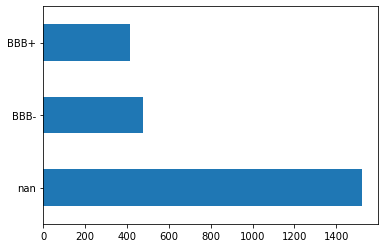

In [7]:
fig, ax = plt.subplots()
prox_knowledge['BBB+/BBB-'].value_counts(dropna=False).plot(kind='barh', ax=ax)
attila_utils.savefig(fig, 'bbb-barplot-chembl-screen')

['named-figure/bbb-barplot-chembl-screen-confidence-groups.png',
 'named-figure/bbb-barplot-chembl-screen-confidence-groups.pdf']

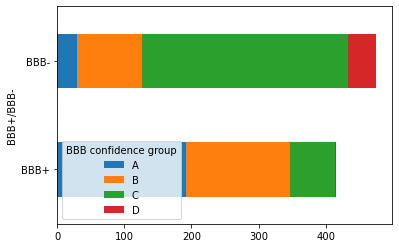

In [8]:
fig, ax = plt.subplots()
vc = prox_knowledge[['BBB+/BBB-', 'BBB confidence group']].value_counts()
vc = pd.concat([vc.index.to_frame(), vc.to_frame(name='count')], axis=1)
vc = vc.pivot(index='BBB+/BBB-', columns='BBB confidence group', values='count')
vc.plot(kind='barh', stacked=True, ax=ax)
attila_utils.savefig(fig, 'bbb-barplot-chembl-screen-confidence-groups')

Explanation of confidence groups.  See article [here](https://www.nature.com/articles/s41597-021-01069-5)

*    Group A: Molecules with numerical data. Several threshold values for log BB have been used to determine if a molecule is BBB permeable or not, including 0, 0.1, −1, (−2, 1). The value of −1 is chosen as the threshold value to define if a compound is BBB+ or BBB− since this is the mostly widely used threshold and maximizes the ease of comparison with other studies.
*    Group B: Molecules from sources that use log BB = −1 as the threshold value, and where all sources agree on the categorical label. The unambiguous label is used.
*    Group C: Molecules where all sources agree on the categorical label, but the sources that do not report their threshold value.
*    Group D: Molecules with two different BBB permeability labels. The most prevalent label is used. In the 45 cases where the two labels occurred with equal frequency, the molecule was discarded.

In [9]:
%connect_info

{
  "shell_port": 56290,
  "iopub_port": 56291,
  "stdin_port": 56292,
  "control_port": 56294,
  "hb_port": 56293,
  "ip": "127.0.0.1",
  "key": "e609821d-1f32f28d42e2553056de871b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-23d54cee-0675-44bb-b806-784fa86511a7.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
